# NumPy Basics

### Why NumPy is so efficient
#### 1. Internally stores data in contiguous block of memory, so easy to retrieve.
#### Has alogrithm library written in C that can operate on this memory without any type-checking or overhead.
#### NumPy arrays also use much less memory than other built-in Python sequences.
#### 2. NumPy operations perform Complex Computations without need for Python loops.

In [2]:
import numpy as np
my_arr = np.arange(1000000) # NumPy array
my_list = list(range(1000000))

In [3]:
# Time for NumPy operation
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 21.9 ms


In [4]:
# Time for List operation
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 776 ms


#### Huge difference in performance time between the 2 (10 to 100 times faster). 

## NumPy ndarray
#### Fast, flexible container for large datasets. Perform mathematical operations on blocks of data.
#### It is a container for homogenous data, all its elements must be of same type.
#### Every array has shape (tuple showing size of each dimension) and dtype (showing data type of the array).

In [7]:
data = np.random.randn(2,3)
data

array([[-0.82998021,  0.89132479,  1.09535155],
       [ 0.61204807, -0.64781786,  0.66609335]])

In [8]:
data * 10

array([[-8.29980207,  8.91324786, 10.95351546],
       [ 6.12048066, -6.47817862,  6.66093346]])

In [9]:
data + data

array([[-1.65996041,  1.78264957,  2.19070309],
       [ 1.22409613, -1.29563572,  1.33218669]])

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

In [13]:
data.ndim

2

### Different ways to create ndarray
#### 1. array - Will create an array out of a list. For list of lists, will create a higher-dimensional array.
#### 2. empty - Creates array without initializing values. May return uninitialized garbage values.
#### 3. zeros - Creates array initialized with zeroes.
#### 4. arange - Create array initialized with range of values.
#### For empty and zeros, pass the size of the array. For creating multi-dimensional arrays, use tuples.

In [15]:
data1 = [6, 4.5, 0, 8, 1]
arr1 = np.array(data1)
arr1

array([6. , 4.5, 0. , 8. , 1. ])

In [16]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.empty((2,3))

array([[1.65996041, 1.78264957, 2.19070309],
       [1.22409613, 1.29563572, 1.33218669]])

In [20]:
np.empty((2,3,1))

array([[[1.65996041],
        [1.78264957],
        [2.19070309]],

       [[1.22409613],
        [1.29563572],
        [1.33218669]]])

In [21]:
np.arange(5)

array([0, 1, 2, 3, 4])

### NumPy Data Types
#### dtype is a special object, containing information (metadata) the ndarray needs to interpret a chunk of memory as a particular data type.
#### It makes numpy flexible to interact with data from other systems. They provide mapping directly to underlying disk or memory representations.
#### This makes it easy to read & write binary streams of data to disk & connect to low-level language code like C.
#### NumPy tries to infer a good data type for any array that it creates.
#### The naming convention is type of data followed by number of bits per element. eg: int23, float64, etc.

In [23]:
arr1 = np.array([1,2,3], dtype = np.float64)
arr1

array([1., 2., 3.])

In [24]:
arr2 = np.array([1,2,3], dtype = np.int32)
arr2

array([1, 2, 3])

In [25]:
arr1.dtype

dtype('float64')

In [26]:
arr2.dtype

dtype('int32')

#### We can convert or cast an array from 1 dtype to another with astype.
#### We can also directly used dtype of another array.
#### But there may be loss off data if we convert larger size dtype to smaller ones.
#### Loos of data can also happen due to the nature of the data eg. string_ type
#### If the casting may fail, then a ValueError will be raised.

In [30]:
arr = np.array([1,2,3,4])
arr.dtype

dtype('int32')

In [31]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4.])

In [32]:
arr.astype(float_arr.dtype)

array([1., 2., 3., 4.])

In [33]:
arr = np.array([3.4, -1.4, -4.2, 0.4, 10.4])
arr.astype(np.int32)

array([ 3, -1, -4,  0, 10])

In [34]:
strings = np.array(['1.23','-9.6','43'], dtype=np.string_)

strings.astype(float)

array([ 1.23, -9.6 , 43.  ])

## Arithmetic with NumPy arrays
#### Arrays help in expressing batch operations without writing 'for loops'.
#### Arithemetic operations between equal sized arrays applies to element-wise operations.
#### Scalar operations propogate the scalar argument to each element in the array.
#### Comparisons between equal sized arrays yields boolean arrays.
#### Operations between differently sized arrays is called broadcasting.

In [37]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [38]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [39]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [41]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [42]:
arr2 = np.array([[0., 4., 1.],[7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [43]:
arr2 > arr1

array([[False,  True, False],
       [ True, False,  True]])

## Basic indexing and slicing
#### There are many ways to select a subset of data.
#### 1d arrays are simple and work similarl to Python lists.

In [45]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
arr[5]

5

In [47]:
arr[5:8]

array([5, 6, 7])

#### You can assign a scalar value to a slice, then that value is broadcasted to entire selection.
#### Difference between lists and ndarrays is that array slices are views to original arrays.
#### Data is NOT copied and modifications to the view will affect original array.

In [48]:
arr[5:7] = 12

In [49]:
arr

array([ 0,  1,  2,  3,  4, 12, 12,  7,  8,  9])

#### A "bare" slice [:] will assign to all values in an array.

In [52]:
arr[:] = 64
arr

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

#### NumPy has been designed this way to be able to work with very large arrays.
#### If copy to array slices was allowed, then it would cause a lot of performance and memory problems.
#### If you want to make a copy, you have to explicitly mention it.

In [54]:
arr_copy = arr[5:8].copy()
arr_copy[:] = 12
arr

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

#### For higher dimension arrays, elements at each index are arrays and not scalars.
#### Individual elements can be accessed recursively or through a comma seperated list.
#### Axis 0 is rows and axis 1 is columns.

In [71]:
arr2d  = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [72]:
arr2d[0][2]

3

In [73]:
arr2d[0,2]

3

#### If we omit lower indices, we will get all the values that are present in the higher index.
#### We can assign both scalar and array value to higher dimensional array.

In [75]:
arr2d[0]

array([1, 2, 3])

In [76]:
arr_copy = arr2d[0].copy()
arr2d[0] = 42
arr2d

array([[42, 42, 42],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [78]:
arr2d[0]=arr_copy
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Indexing with Slices
#### ndarrays can be sliced in the same format as Python lists.

In [80]:
arr

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

In [81]:
arr[1:6]

array([64, 64, 64, 64, 64])

#### Slicing higher dimensional arrays is a bit different.
#### A slice selects elements from the axis 0 or rows.
#### To select multiple axis elements, we need to pass multiple slices.

In [83]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [84]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

#### Slicing will always get you array views of the higher arrays.
#### By mixing the integer indexes and slices, you can get lower arrays.

In [88]:
arr2d[1,:3]

array([4, 5, 6])

In [89]:
arr2d[:3,2]

array([3, 6, 9])

#### Assigning single value to a slice changes all the elements in the slice

In [92]:
arr2d[:2,2] = 0
arr2d

array([[1, 2, 0],
       [4, 5, 0],
       [7, 8, 9]])

### Boolean Indexing
#### Comparisons with Numpy arrays are also vectorized. so they result in a Boolean array.
#### This array can also be passed when indexing the array.

In [94]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names =='Bob'

array([ True, False, False,  True, False, False, False])

In [96]:
names[names != 'Bob']

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [97]:
data = np.random.randn(7,4)
data

array([[ 0.35020554,  1.28446121,  0.38349251,  1.72162633],
       [-0.0872723 , -1.04907486,  1.99997014, -2.43749582],
       [-0.86618079, -0.14741354, -0.3903738 , -1.59466569],
       [-0.13697873, -0.92539916,  2.32080533,  0.52011416],
       [-1.08186853,  1.06656039,  2.48892347, -0.04482491],
       [-1.36610791,  1.58549315, -0.83335567, -1.04326065],
       [-0.58640442,  0.16911337,  1.45909209, -0.43214679]])

In [98]:
data[names=='Bob']

array([[ 0.35020554,  1.28446121,  0.38349251,  1.72162633],
       [-0.13697873, -0.92539916,  2.32080533,  0.52011416]])

#### The boolean arrays must be of the same length as the array they are indexing.
#### The boolean selection will not fail if the boolean array is not of correct length. So you should be careful when using this feature.
#### You can mix boolean arrays with slices or integers.

In [101]:
data[names == 'Bob', 2:]

array([[0.38349251, 1.72162633],
       [2.32080533, 0.52011416]])

In [102]:
data[names == 'Bob', 3]

array([1.72162633, 0.52011416])

#### To select outside a condition use the != operator or simply negate the condition using ~.
#### The ~ operator can be usefule when you want to negate an already existing general condition.
#### You can combine multiple conditions with arithematic operators & and |. Normal Python versions 'and' and 'or' do not work here.
#### Boolean indexing always creates a copy of the data, even if it is unchanged.

In [105]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [106]:
data[~(names == 'Bob')]

array([[-0.0872723 , -1.04907486,  1.99997014, -2.43749582],
       [-0.86618079, -0.14741354, -0.3903738 , -1.59466569],
       [-1.08186853,  1.06656039,  2.48892347, -0.04482491],
       [-1.36610791,  1.58549315, -0.83335567, -1.04326065],
       [-0.58640442,  0.16911337,  1.45909209, -0.43214679]])

In [107]:
cond = names == 'Bob'
data[~cond]

array([[-0.0872723 , -1.04907486,  1.99997014, -2.43749582],
       [-0.86618079, -0.14741354, -0.3903738 , -1.59466569],
       [-1.08186853,  1.06656039,  2.48892347, -0.04482491],
       [-1.36610791,  1.58549315, -0.83335567, -1.04326065],
       [-0.58640442,  0.16911337,  1.45909209, -0.43214679]])

In [108]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [109]:
data[mask]

array([[ 0.35020554,  1.28446121,  0.38349251,  1.72162633],
       [-0.86618079, -0.14741354, -0.3903738 , -1.59466569],
       [-0.13697873, -0.92539916,  2.32080533,  0.52011416],
       [-1.08186853,  1.06656039,  2.48892347, -0.04482491]])

#### Boolean indexing is simple because it works in a common-sense way.
#### Setting whole rows and columns using one-dimensional boolean array is also easy.

In [111]:
data[data < 0] = 0
data

array([[0.35020554, 1.28446121, 0.38349251, 1.72162633],
       [0.        , 0.        , 1.99997014, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.32080533, 0.52011416],
       [0.        , 1.06656039, 2.48892347, 0.        ],
       [0.        , 1.58549315, 0.        , 0.        ],
       [0.        , 0.16911337, 1.45909209, 0.        ]])

In [112]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.99997014, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.58549315, 0.        , 0.        ],
       [0.        , 0.16911337, 1.45909209, 0.        ]])

### Fancy Indexing
#### It is a term to describe indexing using integer arrays.
#### We can use it to select subset of rows in particular order.
#### Negative indices select rows from the end.

In [114]:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [115]:
arr[[4,3,0,2]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [2., 2., 2., 2.]])

In [116]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

#### Passing mutiple index arrays selects 1d array with each element belonging to a tuple of respective indices.
#### Eg: [[1,5,7,2],[0,3,1,2]] will get elements (1,0), (5,3), (7,1), (2,2)
#### Multiple indices always give a 1d array as a result.
#### To get a rectangular subset, we need to use the indices as subset.
#### Fancy Indexing always results in copy of data.

In [118]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [119]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [122]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing and Swapping Axes
#### Transposing - Special form of reshaping. ndarrays have 'transpose' method and special 'T' attribute.
#### 'T' is a special case of swapping axes. Numpy also has 'swapaxes' method, which takes a pair of axis numbers and switches indicated axes to rearrange the data.
#### For getting dot products we can use the np.dot function.
#### For higher arrays, transpose will accept a tuple of axis numbers to permute the axes.
#### All the methods return a view and do not make a copy of the array.

In [124]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [125]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [126]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [127]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [128]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [129]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions
#### Also called ufunc, is a function that performs element-wise operations on data in ndarrays.
#### Can be thought as fast vectorized wrappers for simple functions.
#### Unary ufuncs accept 1 array as input. Binary ufuncs take 2 arrays and return single array as result.

In [131]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [132]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [133]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [134]:
x = np.random.randn(8)
y = np.random.randn(8)

In [135]:
x

array([-0.44340366, -0.5063125 ,  2.93378063, -1.06516609, -0.08656581,
       -0.79077555,  1.57882021, -0.5497823 ])

In [136]:
y

array([-0.08570186,  1.69505143, -0.01471107, -0.29070661,  1.23498209,
       -0.51118413,  0.58261211, -0.48581904])

In [137]:
np.maximum(x,y)

array([-0.08570186,  1.69505143,  2.93378063, -0.29070661,  1.23498209,
       -0.51118413,  1.57882021, -0.48581904])

#### Some ufuncs can return multiple arrays. 'modf' is one example. It is the Numpy version of Python's divmod.
#### It return fractional and integral parts of a floating point array.
#### Ufuncs have optional 'out' argument. It allows them to operate in-place on arrays.

In [139]:
remainder, whole_part = np.modf(arr)

In [140]:
remainder

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [141]:
whole_part

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Array-Oriented Programming with Arrays
#### We can use Numpy to express data processing tasks as concise array expressions and avoid writing loops.
#### Vectorization is the practice of replacing explicit loops with array expressions.
#### Vectorized array operation will often be 1 or 2 (or more) orders of magnitude faster than Python counterparts.

#### Example
#### Evaluate function sqrt(x^2 + y^2) across regular grid of values.
#### Will use enp.meshgrid to take 2 1-D arrays and produce 2 2-D matrices corresponding to all pairs of (x,y) in the 2 arrays.

In [145]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)

In [146]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

#### Now we will use the 2 arrays and use them in the expression.
#### We will use matplotlib to create visualisations of this 2-D array.

In [148]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

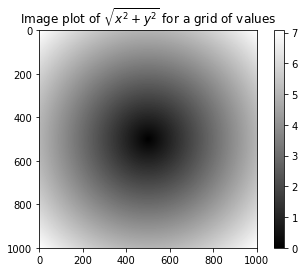

In [149]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray);plt.colorbar()


### Expressing Conditional Logic as Array Operations
#### 'numpy.where' is vectorized version of ternary expression "x if condition else y".
#### Example of 3 arrays.

In [152]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

#### We want to take a value from arr or yarr based on the value in cond array.
#### Let's check a Python List comprehension first. 

In [154]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

#### There are multiple problems with this-
#### 1. It will not work for very large arrays as all work is being done in interpreted Python Code.
#### 2. It will not work with Multidimensional arrays.
#### With np.where, this can be done very concisely.

In [157]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

#### Second and Third arguments do not need to be arrays, they can be scalars as well.
#### Typical use is to produce new values based on another array.

In [159]:
arr = np.random.randn(4,4)
arr

array([[-0.74122273,  0.39644299,  1.6108874 ,  1.2736541 ],
       [-0.10609104,  0.0264075 ,  1.09139844,  0.11420908],
       [-0.01466236,  1.23467661,  0.48692592, -0.32665657],
       [ 1.20244839, -0.10119162, -0.96773116,  1.36798344]])

In [160]:
arr > 0

array([[False,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [162]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [-2,  2,  2,  2],
       [-2,  2,  2, -2],
       [ 2, -2, -2,  2]])

In [163]:
np.where(arr > 0, 2, arr)

array([[-0.74122273,  2.        ,  2.        ,  2.        ],
       [-0.10609104,  2.        ,  2.        ,  2.        ],
       [-0.01466236,  2.        ,  2.        , -0.32665657],
       [ 2.        , -0.10119162, -0.96773116,  2.        ]])

## Mathematical and Statistical methods
#### There are methods in the array class that compute statistics about an entire array or about data along an axis.
#### You can use aggregations (reductions) either by calling array instance method or top-level NumPy function.
#### Eg - sum, mean, std, etc.

In [165]:
arr = np.random.randn(5,4)
arr

array([[-0.30764102, -1.39433028,  1.00435018,  0.97198033],
       [-0.03751212,  0.38774409, -0.1722679 , -0.89256393],
       [ 0.50650635, -2.27633506,  0.27969409,  0.98077098],
       [ 0.78731009, -1.53407943,  1.00515138,  1.99405271],
       [ 1.5973272 , -1.35787503, -0.28259648,  0.21150822]])

In [166]:
arr.mean()

0.07355971785207557

In [167]:
np.mean(arr)

0.07355971785207557

In [168]:
arr.sum()

1.4711943570415114

#### Aggregation functions take an optional 'axis' argument that computes statistics over a given axis.
#### Axis 1 means Columns and Axis 0 means Rows.

In [170]:
arr.mean(axis=1)

array([ 0.0685898 , -0.17864996, -0.12734091,  0.56310869,  0.04209097])

In [171]:
arr.mean(axis=0)

array([ 0.5091981 , -1.23497514,  0.36686626,  0.65314966])

#### Some methods do not aggregateand instead produce array of intermediate results. eg - cumsum, cumprod.
#### In multi-dimensional arrays, these same functions return an array of same size.
#### But they output has partial aggregates computed along the indicated axis.

In [173]:
arr = np.array([0,1,2,3,45,6,7])
arr.cumsum()

array([ 0,  1,  3,  6, 51, 57, 64], dtype=int32)

In [174]:
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [175]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [176]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

### Methods for Boolean arrays
#### Sum can often be used to count True values in a Boolean array.
#### The method 'any' checks if 1 or more values in an array is True.
#### The method 'all' checks if every value is True.
#### This works with non-Boolean arrays, where non-zero elements evaluate to True.

## Sorting
#### Just like Python's list, ndarrays can also be sorted in-place with sort.
#### For multi-dimensional arrays, we can sort sections along a dimension by passing axis number.
#### np.sort returns a copy of the array instead of sorting in-place.
#### A quick way of getting quantiles is to sort array and select value at a particular rank.

In [183]:
arr = np.random.randn(6)
arr

array([ 0.35479202, -0.39810226,  1.31494373, -0.84614833,  1.33831323,
       -3.31635844])

In [184]:
arr.sort()
arr

array([-3.31635844, -0.84614833, -0.39810226,  0.35479202,  1.31494373,
        1.33831323])

In [185]:
arr = np.random.randn(5,3)
arr

array([[ 0.81870756, -0.06119759, -0.88887598],
       [ 2.11856786, -0.93286628, -0.16550543],
       [-0.28535572, -1.39268555, -0.62279873],
       [ 0.45246504,  0.4505424 , -0.08760122],
       [ 1.23284699, -0.50998863, -0.58692972]])

In [186]:
arr.sort(1)
arr

array([[-0.88887598, -0.06119759,  0.81870756],
       [-0.93286628, -0.16550543,  2.11856786],
       [-1.39268555, -0.62279873, -0.28535572],
       [-0.08760122,  0.4505424 ,  0.45246504],
       [-0.58692972, -0.50998863,  1.23284699]])

In [187]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6244249894535554

## Unique and Other Set logic
#### NumPy has some basic set operations of 1-D arrays.
#### np.unique returns sorted unique values in an array.
#### np.in1d checks presence of values of one array in another.

In [189]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [190]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [191]:
values = np.array([6,0,0,2,3,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## File Input and Output with Arrays
#### NumPy can save and load data to and from disk, in text or binary format.
#### Since most people will use pandas for text or tabular loading, we will use NumPy only in binary format.
#### np.save and np.load will save and load arrays to/from disks.
#### Arrays are by default saved in uncompressed raw binary format with extension '.npy'.
#### If file path does not have .npy extension, it will be appended.
#### array on disk can be loaded with np.load.

In [193]:
arr = np.arange(10)
np.save('some_array', arr)

In [195]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### To save multiple arrays in uncompressed archive, you can use np.savez. File extension is '.npz'.
#### Pass the arrays as arguments with label to the savez command.
#### When loading, NumPy will load the arrays in a dictionary like object, with the labels as keys and arrays as values.

In [198]:
np.savez('array_archive.npz', a=arr, b=arr)

In [199]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### If your data compresses well, use the np.savez_compressed command instead.

In [201]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## Linear Algebra
#### Using a * between two 2-D arrays leads to element-wise multiplication instead of dot product.
#### Hence, NumPy ha sthe function 'dot' for matrix multiplication. x.dot(y) is equivalent to np.dot(x,y).
#### Matrix product between 2-D and 1-D array of right size results in a 1-D array.
#### The '@' symbol (>=Python 3.5) also works as infix operator for matrix multiplication. 

In [203]:
x = np.array([[1.,2.,3.], [4.,5.,6.]])
y = np.array([[6.,23.], [-1,7],[8,9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [204]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [205]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [206]:
x @ np.ones(3)

array([ 6., 15.])

#### The module numpy.linalg has the set of functions for matrix decomposition and other functions.
#### They are implemented under the hood via same industry-standard libraries used in other languages like R and MATLAB. Eg - BLAS, LAPACK or Intel MKL.

In [210]:
from numpy.linalg import inv, qr

X = np.random.randn(5,5)
mat = X.T.dot(X)
inv(mat)

array([[  63.48383781,  197.70058242,  225.18410798, -217.41299738,
         -18.17182633],
       [ 197.70058242,  620.24850578,  706.787963  , -682.0388079 ,
         -59.41053306],
       [ 225.18410798,  706.787963  ,  805.92877339, -777.36399507,
         -68.48949687],
       [-217.41299738, -682.0388079 , -777.36399507,  750.3109925 ,
          65.61718389],
       [ -18.17182633,  -59.41053306,  -68.48949687,   65.61718389,
           8.19630524]])

In [211]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.24409169e-13, -5.22827009e-14,
         1.94528504e-13,  2.02595760e-14],
       [ 2.47562781e-14,  1.00000000e+00,  9.97216869e-13,
         1.55154405e-13, -1.08043005e-13],
       [-1.07704916e-13,  2.79919051e-13,  1.00000000e+00,
        -2.43980638e-13, -2.63509765e-14],
       [-3.42261134e-14, -7.32183316e-13, -2.00967590e-13,
         1.00000000e+00, -2.01342852e-14],
       [ 1.94325023e-14,  4.00824169e-13, -1.83679520e-13,
        -3.22534080e-13,  1.00000000e+00]])

In [212]:
q, r = qr(mat)

In [213]:
r

array([[-8.7615498 , -7.89337087,  6.42644051, -3.51420162,  5.23909184],
       [ 0.        , -6.88642471,  3.1472705 , -3.11353882,  1.3043392 ],
       [ 0.        ,  0.        , -3.29444835, -3.35408006, -0.68754574],
       [ 0.        ,  0.        ,  0.        , -0.03302758,  0.37691397],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00879652]])

## Pseudorandom Number Generation
#### The module numpy.random provides functions for efficiently generating arrays of random values from many kinds of Probablity distributions.
#### Python's inbuilt random module only samples one value at a time. But NumPy is well over an order of magnitude faster for generating very large samples.

In [215]:
samples = np.random.normal(size=(4,4))
samples

array([[-0.21656203,  1.20280149, -0.30236083,  0.43056127],
       [ 1.28695137,  1.77457505,  2.72086458, -0.57325422],
       [ 0.24416883,  0.1130036 , -0.91843298, -0.64987006],
       [ 1.69575643, -1.17482421, -0.01820951, -0.45221461]])

In [216]:
from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0,1) for _ in range(N)]

677 ms ± 4.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [217]:
%timeit np.random.normal(size=N)

29.1 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### The numbers generated are called 'pseudorandom numbers' because they are generated by an algorithm with deterministic behaviour based on the 'seed' of the random number generator.
#### The data generation by default uses a global random seed. To avoid it, use numpy.random.Randomstate to get isolated generators.

In [220]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])